## IPython CookBook 1章
### 1.2 初めてのIpython探索データ分析

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')　# ggplot2風に
%matplotlib inline　# グラフのノート内表示に必要

* 気象庁の平均気温（℃）のデータ
* 京都、新潟、東京、札幌、那覇

In [31]:
# データの読み込み
url = "data.csv"

df = pd.read_csv(url, index_col = "date", parse_dates=[0])
# parse_date : datetime型で読み込む列を指定
# dayfirst : DD/MM（日/月） なデータの時にTrue

In [32]:
df.head(2)　# 頭2行

,Kyoto,Niigata,Tokyo,Sapporo,Naha
date,,,,,
2010-04-01,13.3,10.5,14.7,6.4,23.1
2010-04-02,10.8,7.8,15.2,5.5,19.5


In [33]:
df.describe() # 要約統計量

,Kyoto,Niigata,Tokyo,Sapporo,Naha
count,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000
mean,16.405926,14.273028,16.845637,9.777042,23.263556
std,8.887706,9.046205,8.217452,9.810349,4.784256
min,-1.200000,-2.800000,0.300000,-9.200000,9.200000
25%,8.300000,5.800000,9.200000,0.700000,19.400000
50%,17.000000,14.500000,17.500000,10.000000,23.700000
75%,24.000000,22.200000,23.400000,18.600000,27.900000
max,32.600000,31.500000,33.200000,28.900000,30.600000


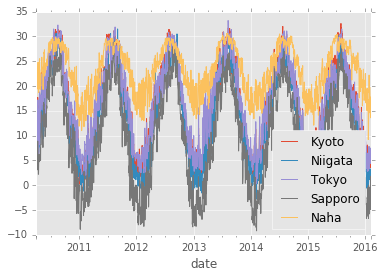

In [34]:
df.plot() # そのままプロット

#### 月ごとにデータをまとめる

In [35]:
monthly = df.groupby(pd.Grouper(level=0, freq='M')).mean()
monthly

,Kyoto,Niigata,Tokyo,Sapporo,Naha
date,,,,,
2010-04-30,12.606667,9.736667,12.393333,5.510000,21.236667
2010-05-31,18.141935,15.722581,18.951613,12.245161,23.777419
2010-06-30,23.676667,21.550000,23.633333,19.183333,26.663333
2010-07-31,27.600000,26.338710,27.996774,22.109677,28.729032
2010-08-31,30.096774,29.029032,29.635484,24.829032,28.883871
2010-09-30,25.896667,23.703333,25.143333,19.980000,28.033333
2010-10-31,19.109677,17.590323,18.880645,12.180645,25.700000
2010-11-30,11.753333,10.773333,13.516667,5.903333,21.436667
2010-12-31,7.512903,6.658065,9.867742,0.635484,18.129032


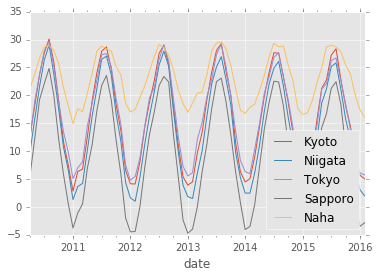

In [36]:
monthly.plot()

#### インタラクティブなグラフ

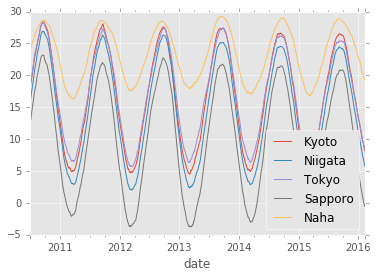

In [38]:
from ipywidgets import interact
@interact # マジックコマンドでインタラクティブに使うことを宣言
def plot(n=(1, 365)): # インタラクティブに描画する関数を作成
    pd.rolling_mean(df, n).dropna().plot()
    plt.show

##### 2016/02/12
from IPython.html.widgets import interact　が廃止に  
from ipywidgets import interac  に変更になった模様  

In [41]:
yearly = df.groupby(pd.Grouper(level=0, freq='A')).mean()
yearly

,Kyoto,Niigata,Tokyo,Sapporo,Naha
date,,,,,
2010-12-31,19.615636,17.921455,20.021455,13.633818,24.737818
2011-12-31,16.009863,13.961370,16.520274,9.346301,22.880274
2012-12-31,15.778142,13.856284,16.326503,9.363661,23.023770
2013-12-31,16.262466,13.900000,17.141918,9.314521,23.306027
2014-12-31,16.128219,13.761918,16.642740,9.387123,23.091781
2015-12-31,16.689863,14.461370,16.454795,10.075616,23.620274
2016-12-31,5.495238,2.771429,5.988095,-3.316667,17.054762


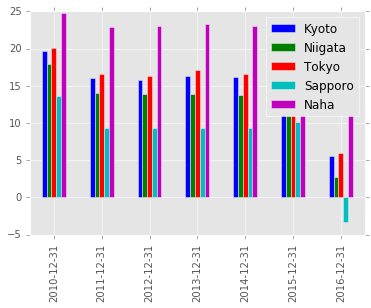

In [43]:
yearly.index = yearly.index.format()
yearly.plot.bar()

### 今後の勉強ネタ
* pandasのプロット機能について　あくまでもPandasベース、pandasをいじって少し凝ったことも
[Python pandas プロット機能を使いこなす](http://sinhrks.hatenablog.com/entry/2015/11/15/222543)

* pandsのグルーピング機能について group_byにリストを渡すことで割りと柔軟にまとめられる？
[Python pandas アクセサ / Grouperで少し高度なグルーピング/集計](http://sinhrks.hatenablog.com/entry/2014/10/30/233606)  
[Python pandas でのグルーピング/集約/変換処理まとめ](http://sinhrks.hatenablog.com/entry/2014/10/13/005327)

* グルーピングに関連した時系列データの扱い
[Time Series / Date functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) # Offset Aliases